## **About the Dataset**
This is a dataset that includes 9 observations about the characteristics of each unique diamond, as well as the price.

Carat- Carat weight of the diamond

Cut - The cut rating of the diamond

Color - The color rating of the diamond

Clarity - The clarity rating of the diamond

Table - The table width of the diamond

Depth- The percentage of depth of the diamond

Price - The price (in USD) of the diamond

X- X dimension of the diamond

Y- Y dimension of the diamond

Z- Z dimension of the diamond

### Importing the necesarry libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
diamond_df = pd.read_csv('diamonds.csv', index_col=0)
diamond_df.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## PREPROCESSING

In [3]:
diamond_df.shape

(53940, 10)

In [4]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#Checking for missing values
diamond_df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
#counting the unique value in the cut column
diamond_df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
#counting the unique value in the color column
diamond_df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [9]:
#counting the unique value in the clarity column
diamond_df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [10]:
#Counting the number of zero values in each columns

for i in diamond_df.columns:
    print(i + ' - ' + str(len(diamond_df[diamond_df[i] == 0])))

carat - 0
cut - 0
color - 0
clarity - 0
depth - 0
table - 0
price - 0
x - 8
y - 7
z - 20


* Notice that only the x,y,z columns contain zero values and knowing the fact that the dimension of an object cannot be 0, it implies that the entries are error hence they are dropped

In [11]:
#dropping the zeros in x
diamond_df = diamond_df.drop(diamond_df[(diamond_df['x'] == 0)].index)
#dropping the zeros in y
diamond_df = diamond_df.drop(diamond_df[(diamond_df['y'] == 0)].index)
#dropping the zeros in z
diamond_df = diamond_df.drop(diamond_df[(diamond_df['z'] == 0)].index)

In [12]:
for i in diamond_df.columns:
    print(i + ' - ' + str(len(diamond_df[diamond_df[i] == 0])))

carat - 0
cut - 0
color - 0
clarity - 0
depth - 0
table - 0
price - 0
x - 0
y - 0
z - 0


The zeros have been successfully dropped

## VISUALIZATION

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'COUNT OF UNIQUE CUT TYPES')

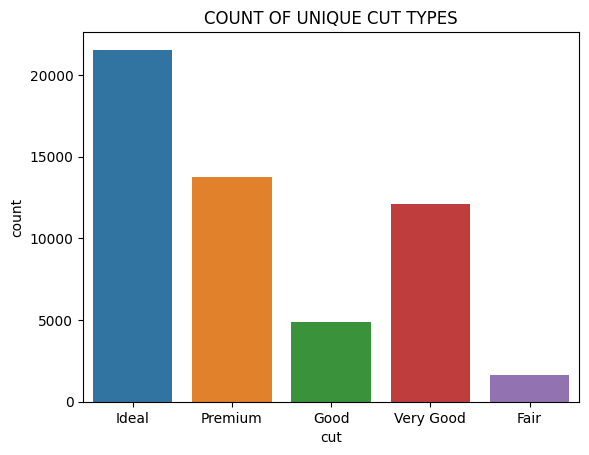

In [13]:
#count of unique cut types
sns.countplot(diamond_df['cut'])
plt.title('COUNT OF UNIQUE CUT TYPES')

In [14]:
diamond_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Text(0.5, 1.0, 'COUNT OF UNIQUE CUT TYPES')

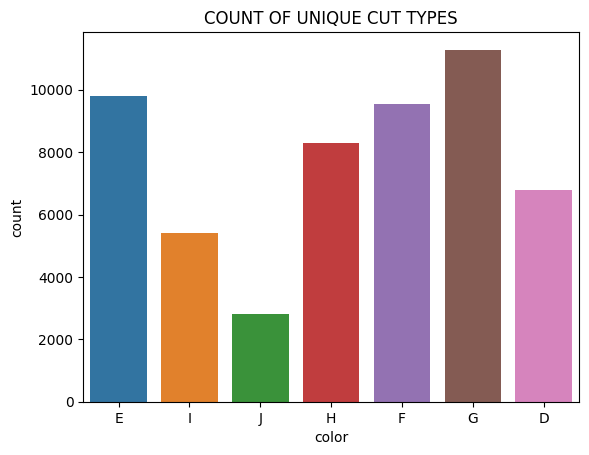

In [15]:
#count of unique cut types
sns.countplot(diamond_df['color'])
plt.title('COUNT OF UNIQUE CUT TYPES')

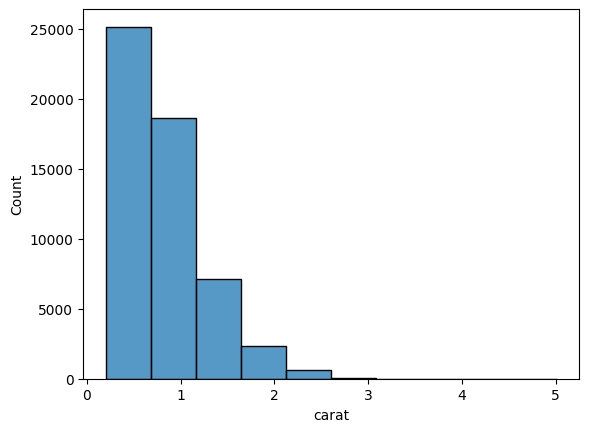

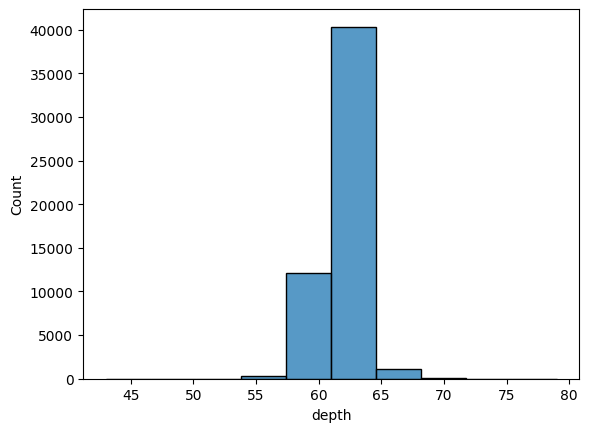

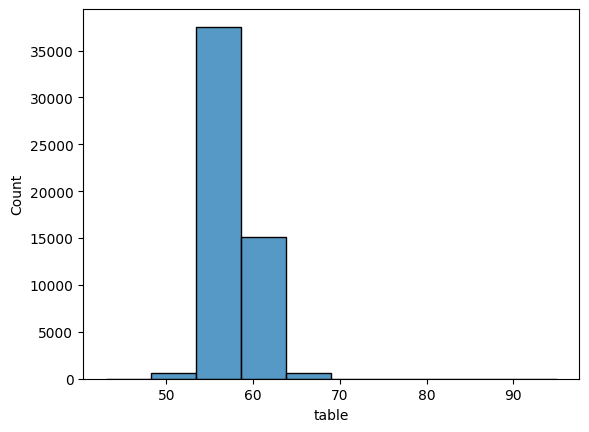

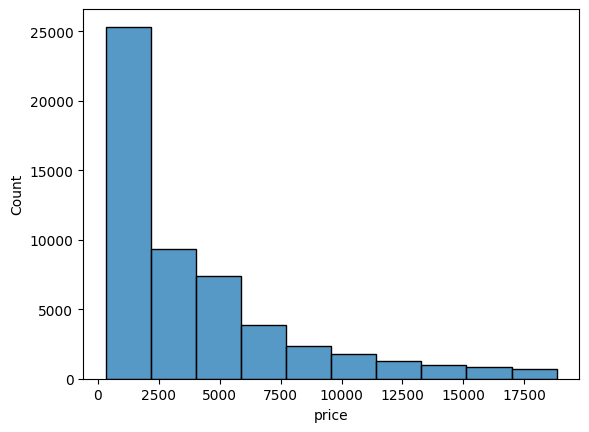

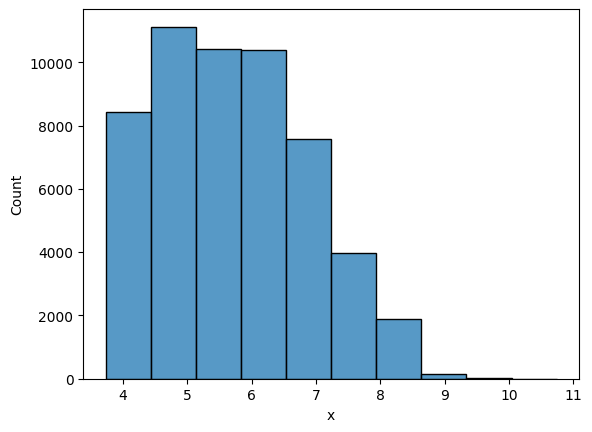

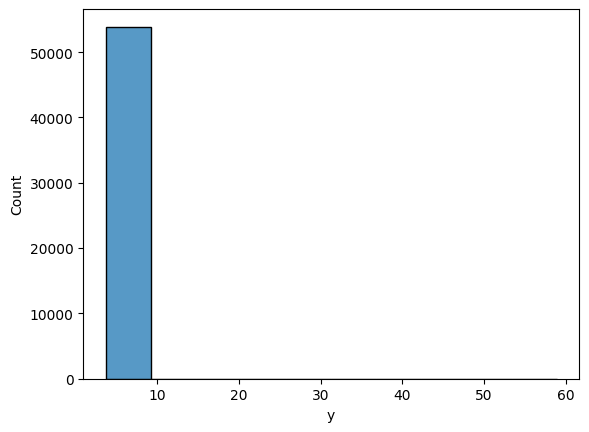

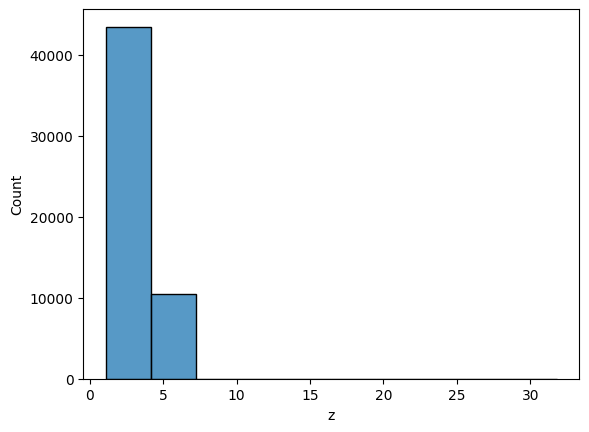

In [16]:
#Distribution of Numerical Variables

df1 = diamond_df.select_dtypes(include=['int64','float64'])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.histplot(x=col, data=df1,bins=10)
    plt.show()

### BIVARIATE ANALYSIS

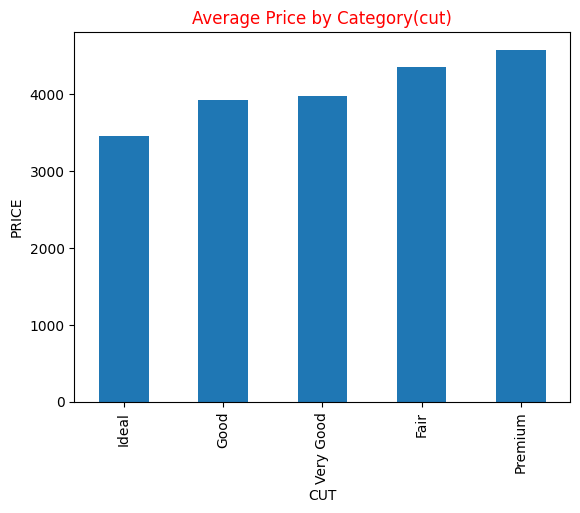

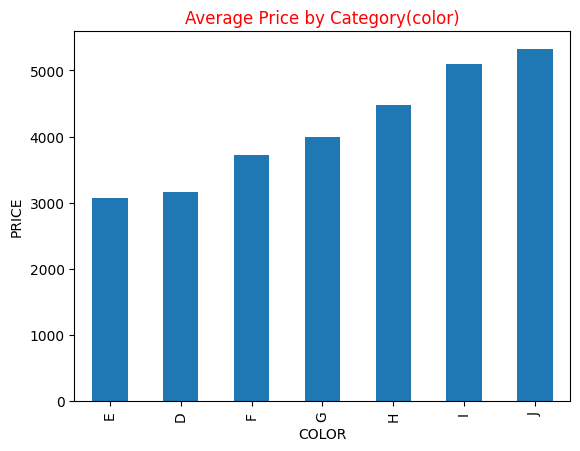

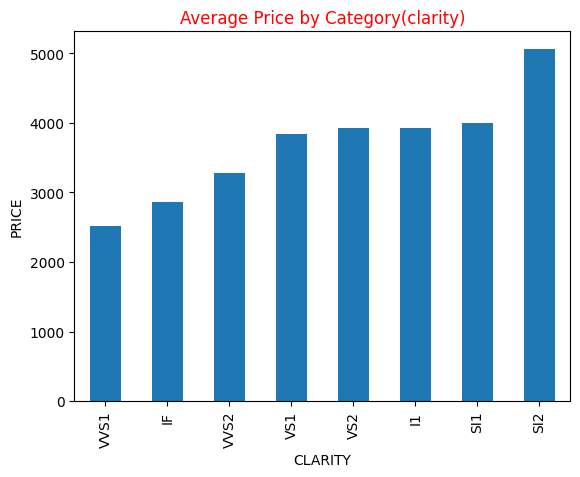

In [17]:
#visualizing the average price for each category
columns = ['cut', 'color', 'clarity']
for i in columns:
    grouped = diamond_df.groupby(i)

    # Calculate the mean price for each category
    mean_price = grouped['price'].mean()
    mean_price = mean_price.sort_values()
    # Plot the results as a bar chart
    mean_price.plot(kind='bar')
    plt.title('Average Price by Category({})'.format(i), color='red')
    plt.xlabel(i.upper())
    plt.ylabel('PRICE')
    plt.show()


<AxesSubplot:>

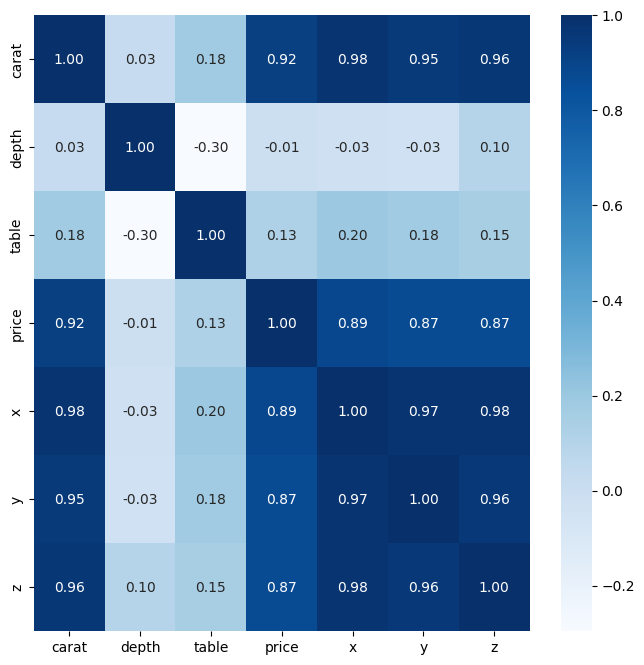

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(diamond_df.corr(), annot=True, fmt='.2f', cmap='Blues')

## Encoding Categorical Columns

The categorical columns are hierarchichal in nature (For Cut, the scale(from highest to lowest) is Ideal>Premium>Very Good>Good>Fair), hence they have to be converted to numerical form to enable efficient modelling

OrdinalEncoding is applied to the cut column  to retain its ordinal nature

A mapping function is applied to the clarity and color columns to convert it to numeric datatype

In [19]:
#encode the cut column
encoder = OrdinalEncoder()
encoder.fit(diamond_df['cut'].values.reshape(-1, 1))
diamond_df['cut'] = encoder.transform(diamond_df['cut'].values.reshape(-1, 1))


#encode the color column
color = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df['color'] = diamond_df['color'].map(color)

#encde the clarity column
clarity = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df['clarity'] = diamond_df['clarity'].map(clarity)


In [20]:
diamond_df['cut'] 

1        2.0
2        3.0
3        1.0
4        3.0
5        1.0
        ... 
53936    2.0
53937    1.0
53938    4.0
53939    3.0
53940    2.0
Name: cut, Length: 53920, dtype: float64

## Checking for outliers 

In [21]:
columns = ['depth', 'table', 'price', 'x', 'y', 'z']

In [22]:
def view(cols):
    sns.boxplot(x = diamond_df[cols])

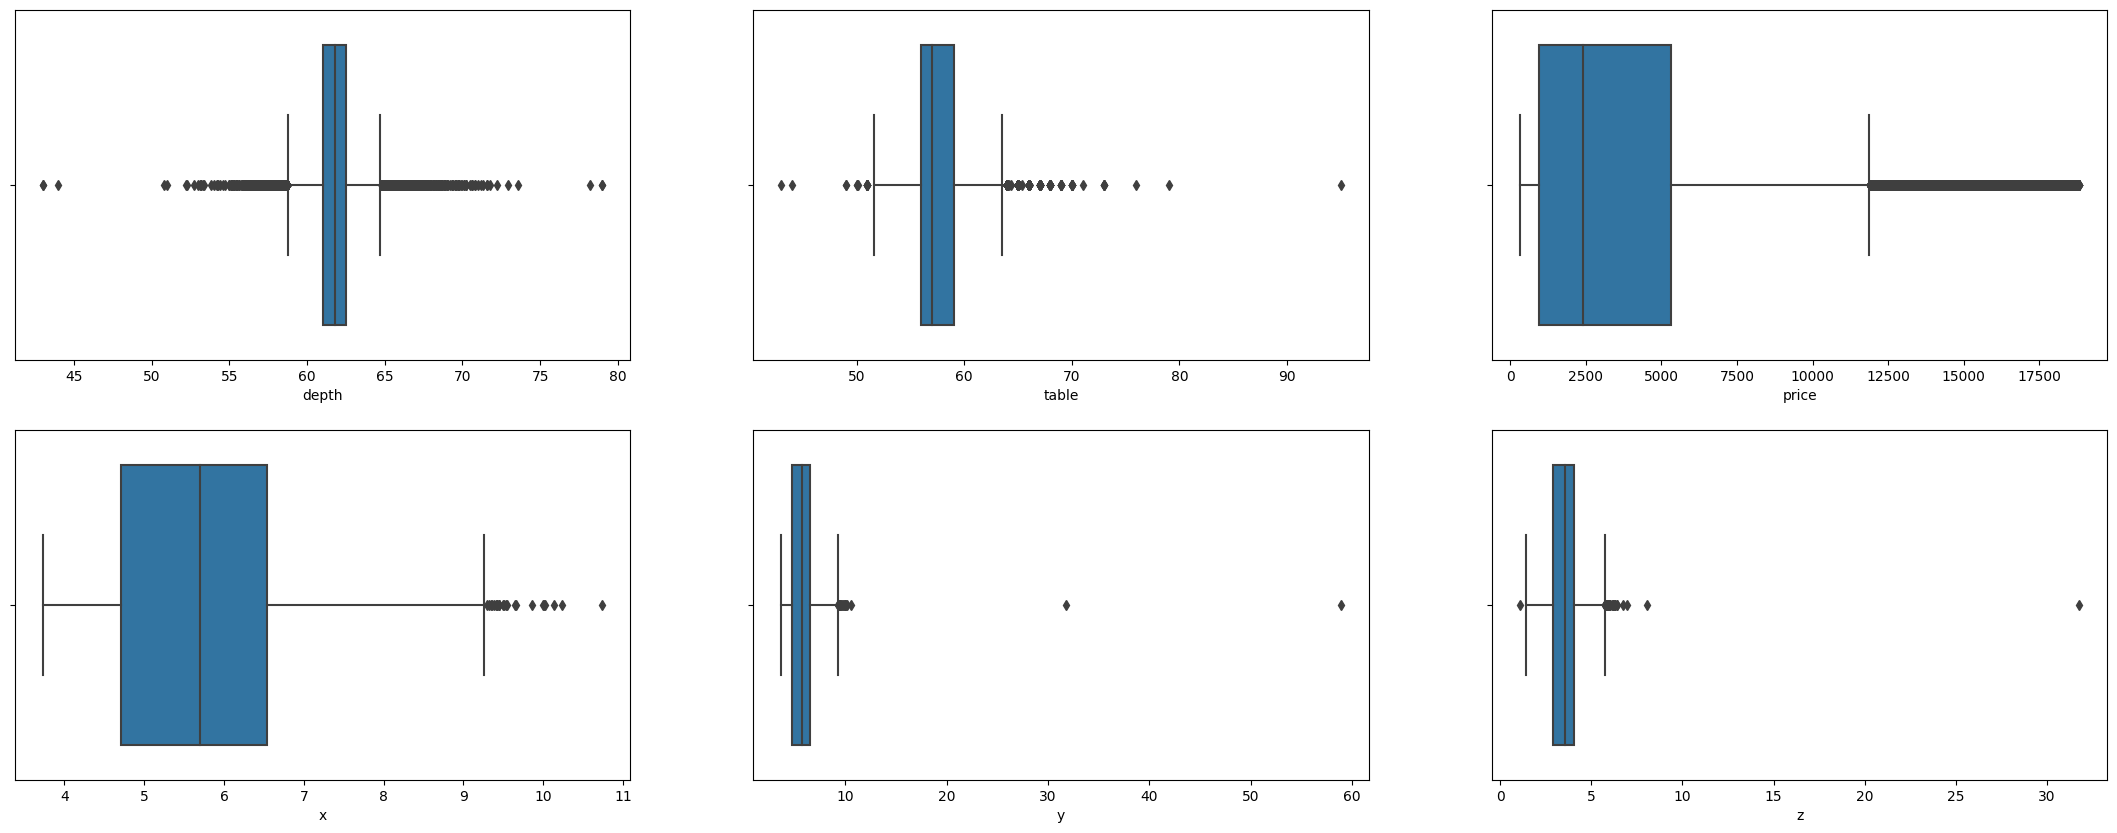

In [23]:
i=0
plt.figure(figsize=(27, 10))
for col in columns:
    
    plt.subplot(2, 3, i+1)
    
    view(col)
    i=i+1

plt.show()

The plot above shows that the columns contains outliers and the depth, table and z columns contains upper and lower outliers while the others contains only upper outliers

For the purpose of this exercise, only values between the 1st and 99th quantile are kept to get rid of the outregeous outliers

In [24]:
#Getting rid of outliers
diamond_df = diamond_df[(diamond_df['depth'] < diamond_df['depth'].quantile(0.99)) & (diamond_df['depth'] > diamond_df['depth'].quantile(0.01))]
diamond_df = diamond_df[(diamond_df['table'] < diamond_df['table'].quantile(0.99)) & (diamond_df['table'] > diamond_df['table'].quantile(0.01))]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[(diamond_df['z'] < diamond_df['z'].quantile(0.99)) & (diamond_df['z'] > diamond_df['z'].quantile(0.01))]

## MODEL BUILDING

The features and target columns are converted to numpy.arrays because numpy arrays is more memory efficient and uses less computational time

In [25]:
#A copy of the dataset is createed for modelling
model_df = diamond_df.copy()

In [26]:
model_df

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.29,3.0,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1.0,0,1,63.3,58.0,335,4.34,4.35,2.75
8,0.26,4.0,2,2,61.9,55.0,337,4.07,4.11,2.53
9,0.22,0.0,5,3,65.1,61.0,337,3.87,3.78,2.49
11,0.30,1.0,0,2,64.0,55.0,339,4.25,4.28,2.73
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,2.0,6,2,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,1.0,6,2,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,4.0,6,2,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,3.0,2,1,61.0,58.0,2757,6.15,6.12,3.74


In [27]:
x = model_df.drop('price', axis=1).values
y = model_df['price'].values

splitting the dataset

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (39236, 9)
x_test shape:  (9809, 9)
y_train shape:  (39236,)
y_test shape:  (9809,)


MODELLING

In [29]:
regressor = LinearRegression()

In [30]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r_score = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

In [31]:
print('R2_Score of the model is: ', round(r_score*100),'%')
print('MSE: ', mse )

R2_Score of the model is:  90 %
MSE:  1123974.5130101643


The baseline accuracy of the model is 90%

This can further be improved with the use of hyperparameter tuning

#### Classifying the dataset based on the cut type

In [32]:
x = diamond_df[diamond_df.columns.drop('cut')]
y = diamond_df['cut']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (39236, 9)
x_test shape:  (9809, 9)
y_train shape:  (39236,)
y_test shape:  (9809,)


##### Importing the necessary classifiers and metrics for classification

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score

#### **DECISION TREE CLASSIFICATION**

In [34]:
dectr = DecisionTreeClassifier()

dectr.fit(x_train, y_train)
predictions = dectr.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
F1_score = f1_score(y_test, predictions, pos_label='positive', average='micro')
recall = recall_score(y_test, predictions, pos_label='positive', average='micro')


print('F1_Score is: ',round(F1_score*100), '%')


F1_Score is:  71 %


#### **RANDOM FOREST CLASSIFICATION**

In [35]:
random = RandomForestClassifier()

random.fit(x_train, y_train)
predictions = random.predict(x_test)

accuracy = accuracy_score(y_test, predictions)



print('F1_Score is: ',round(F1_score*100), '%')


F1_Score is:  71 %


#### **XGBOOST CLASSIFICATION**

In [36]:
xgboost = xgb.XGBClassifier()

xgboost.fit(x_train, y_train)
predictions = xgboost.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
F1_score = f1_score(y_test, predictions, pos_label='positive', average='micro')
recall = recall_score(y_test, predictions, pos_label='positive', average='micro')


print('F1_Score is: ',round(F1_score*100), '%')

F1_Score is:  80 %


#### **HYPERPARAMETER TUNING FOR XGBOOST**

The models above is can be improved using hyperparameter tuning

But for the scope of this exercise, we move on to deployment

* Among the classifications models used, the xgboost returned with the best accuracy
* Hence the model is saved and used for deployment

#### SAVING THE XGBOOST MODEL IN A PICKLE FILE

In [37]:
import pickle
pickle_out = open('xgboost.pkl', 'wb')
pickle.dump(xgboost, pickle_out)
pickle_out.close()

In [38]:
# model for linear regression of price prediction
pickle_out = open('regressor.pkl', 'wb')
pickle.dump(regressor, pickle_out)
pickle_out.close()